### Determining the optimal number of clusters using for the K-Means Algorithm using the Elbow Method

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [132]:
data = pd.read_csv('Iris.csv')
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [133]:
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
X = data[features]
y = data['Species']

In [134]:
X.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [135]:
y.describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: Species, dtype: object

To determine the optimal number of clusters, we can try training the model with different values of k (numbers of clusters). For each of these instances of the model, we can then calculate sum of squared distances of samples to their closest cluster center by calling the attribute ".inertia_" one the model and store it in a list.

In [136]:
sum_of_squares = []
# fitting the model with number of clusters ranging from 1-10
for i in range(1, 11):
    model = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=None)
    model.fit(X)
    sum_of_squares.append(model.inertia_)


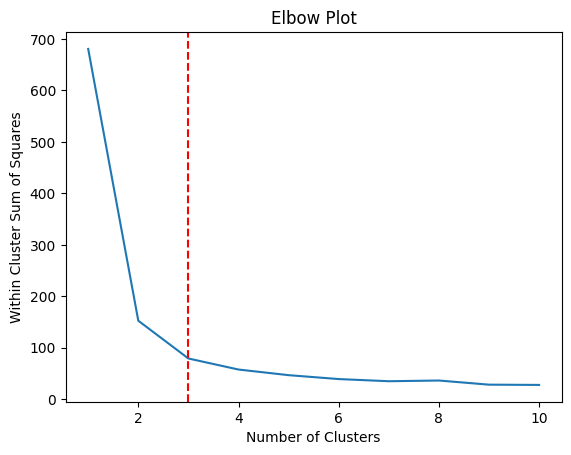

In [137]:
plt.plot(range(1, 11), sum_of_squares)
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares")
plt.title("Elbow Plot")
plt.axvline(3, linestyle='--', color='r')
plt.show()

We see that the moment where the **within cluster sum of squares** starts to not decrease greatly with every iteration is when the number of clusters is 2 and when it's 3. <br>
Thus we choose the lowest elbow point which in our case is 3. suggesting that 3 is the optimal number of clusters for the Iris Dataset.

#### k-means model with 3 clusters

In [140]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init='auto', random_state = 1)
y_pred = kmeans.fit_predict(X)

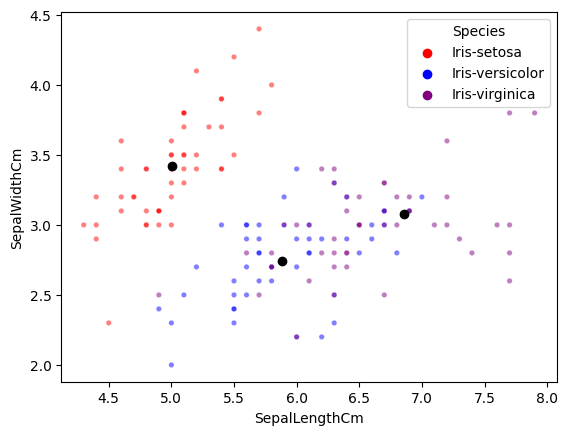

In [150]:
centers = np.array(kmeans.cluster_centers_)
sns.scatterplot(data=data, x='SepalLengthCm', y='SepalWidthCm', hue=y, palette=['red', 'blue', 'purple'], alpha=0.5, s=15)
plt.scatter(centers[:,0], centers[:,1], marker="o", color='black')